# Modelling and Evaluating

## Objectives

* Answer business requirement 2:
* The client is interested to tell wheterh a given leaf is covered with powdery mildew

## Inputs

* image shape embeddings (.pkl file)
* Images from the test, train, validation folders and their subfolders.

* inputs/cherryleaves_dataset/cherry-leaves/train
* inputs/cherryleaves_dataset/cherry-leaves/validation
* inputs/cherryleaves_dataset/cherry-leaves/test

## Outputs

* Visualizations:
    * Distribution plots for images in train, validation, and test sets.
    * Bar chart for label distribution.
    * Pie chart for set distribution (percentages).
* Image Augmentation:
    * Apply augmentation techniques.
    * Plot augmented images for each set.
* Data Preparation:
    * Map class indices for prediction inference in labels.
* Model Creation and Training:
    * Create a machine learning model and display its summary.
    * Train the model and save it.
* Plot learning curves for model performance
* Model Evaluation:
    * Evaluate the model on saved files:
        * Calculate accuracy.
* Calculate classification report:
    * Plot confusion matrix.
    * Save evaluation results in a .pkl file.
* Prediction:
    * Perform prediction on a random image file.

# Comments | Insights | Conclusions

* The same data was plotted in different versions to accomodate possible client's requests of further data understanding.
* The CNN was built seeking maximise accuracy while minimizing loss and training time.
* The CNN was kept as small as possible withouth compromising accuracy and avoiding overfitting.
* More about hyperparameters optimization and trial and error phase is documented in the readme.md file and in a separate .pdf file.

## Import packages

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from matplotlib.image import imread

## Set working directory

In [3]:
cwd = os.getcwd()

In [4]:
os.chdir('/workspace/mildew-detector')
print("You set a new current directory")

You set a new current directory


In [5]:
work_dir = os.getcwd()
work_dir

'/workspace/mildew-detector'

## Set input directories

Set train, validation and test paths

In [6]:
my_data_dir = 'inputs/cherryleaves_dataset/cherry-leaves'
train_path = my_data_dir + '/train' 
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Labels

In [8]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


## Set image shape

In [9]:
import joblib

version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

# Image Distrubtion

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




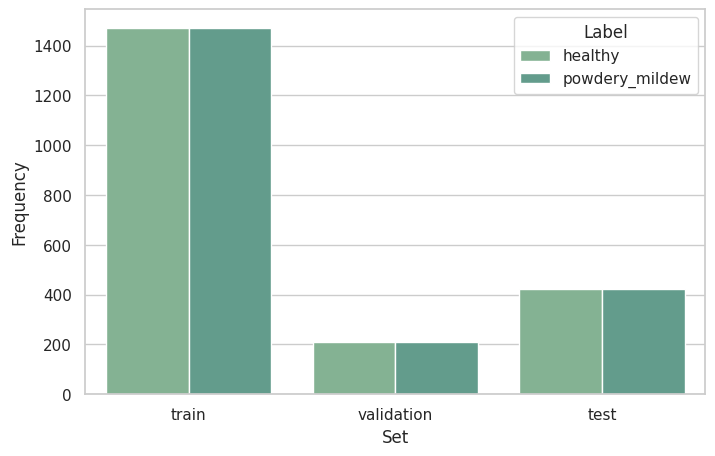

<Figure size 800x500 with 0 Axes>

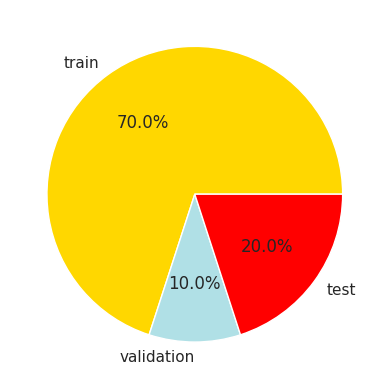

In [10]:
df_freq = pd.DataFrame([]) 
for folder in ['train', 'validation', 'test']:
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':int(len(os.listdir(my_data_dir+'/'+ folder + '/' + label)))}
                  ),
                  ignore_index=True
        )
    
    print(f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

print("\n")
sns.set_theme(style="whitegrid", palette="crest") 
# sns.set_style("whitegrid") 
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')   
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show() 

plt.figure(figsize=(8,5))
labels = 'train', 'validation', 'test'
sizes = [70, 10, 20]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['gold', 'powderblue', 'red']) 
plt.savefig(f'{file_path}/labels_pie.png', bbox_inches='tight', dpi=150) 

# Image data augmentation

## Import ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Initialize ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(rotation_range=30,
                                          width_shift_range=0.15,
                                          height_shift_range=0.15,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          brightness_range=[0.8, 1.2],
                                          channel_shift_range=50.0,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

### Set a Batch size

In [13]:
batch_size = 20

## Augment training image dataset

In [20]:
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices 

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment validation image dataset

In [19]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices 

Found 420 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Augment test image dataset

In [18]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices 

Found 844 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

## Plot augmented training image

(20, 256, 256, 3)


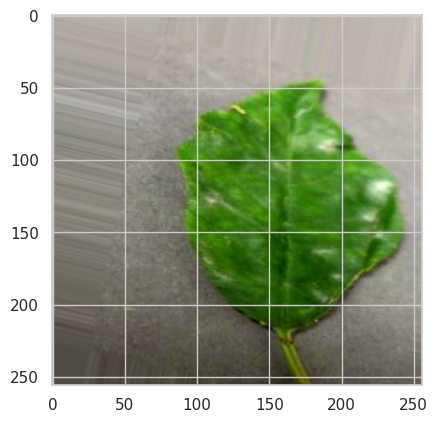

(20, 256, 256, 3)


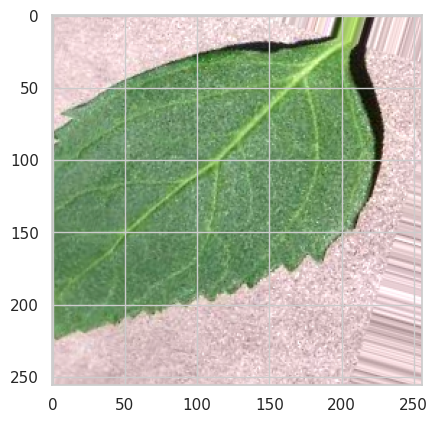

(20, 256, 256, 3)


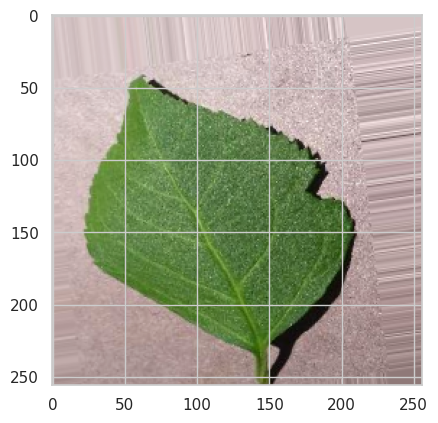

In [21]:
for _ in range(3):
    img, label = train_set.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()  

## Plot augmented validation and test images

(20, 256, 256, 3)


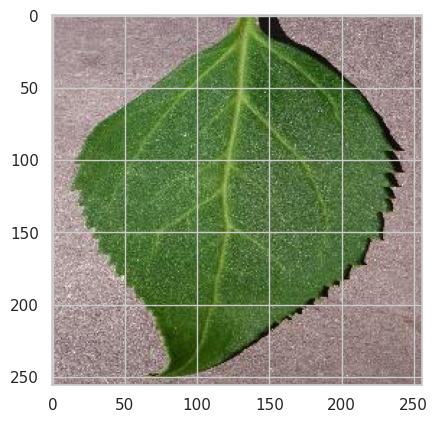

(20, 256, 256, 3)


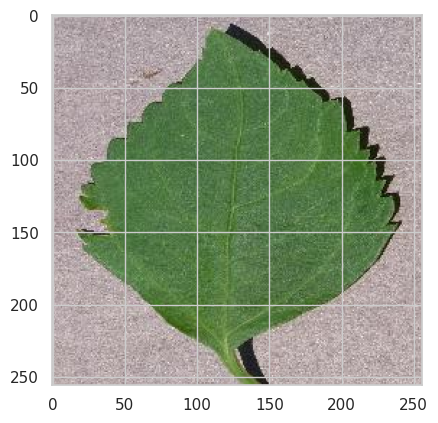

(20, 256, 256, 3)


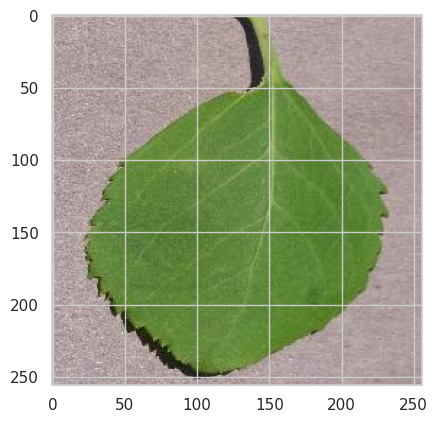

In [22]:
for _ in range(3):
    img, label = validation_set.next()
    print(img.shape)   
    plt.imshow(img[0])
    plt.show() 

(20, 256, 256, 3)


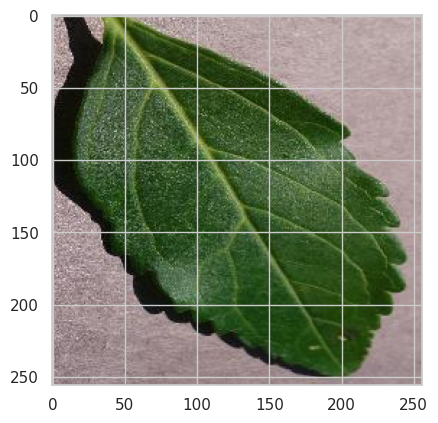

(20, 256, 256, 3)


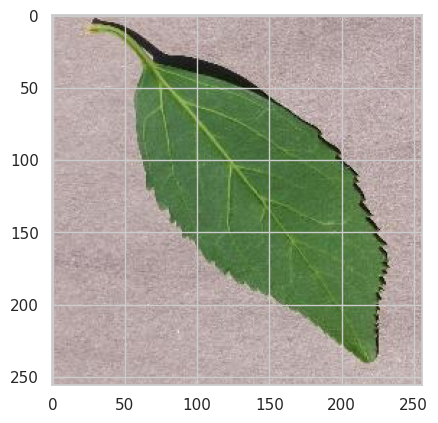

(20, 256, 256, 3)


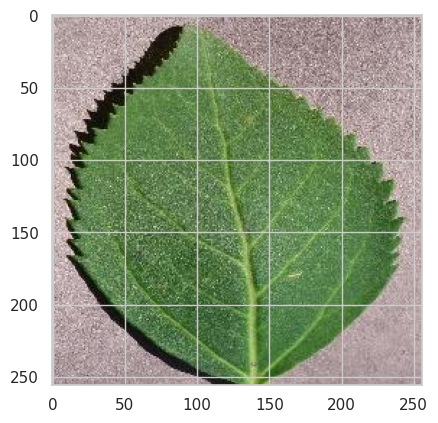

In [23]:
for _ in range(3):
    img, label = test_set.next()
    print(img.shape)  
    plt.imshow(img[0])
    plt.show()

## Save class_indices

In [24]:
joblib.dump(value=train_set.class_indices ,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v1/class_indices.pkl']

# Model creation

## Import model packages

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

## Model

In [102]:
def image_tf_model():
    
    model = Sequential()
    
    # Convolutional layers 
    model.add(Conv2D(filters=16, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=32, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3),
              input_shape=image_shape, activation='relu', ))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten layer
    model.add(Flatten()) 

    # Dense layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

## Model Summary

In [103]:
image_tf_model().summary() 


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 57600)            

## Early Stopping

In [104]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_accuracy',mode='max',verbose=1, patience=2)
m_checkpoint = ModelCheckpoint(filepath='outputs/v1/mildew_detector_model.h5', monitor='val_accuracy', mode='max', save_best_only=False)


## Fit model for training

In [105]:
model = image_tf_model()
model.fit(train_set,
          batch_size=batch_size,
          epochs=15,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop, m_checkpoint],
          verbose=1
          )

Epoch 1/15
147/147 [==============================] - 53s 357ms/step - loss: 0.4828 - accuracy: 0.7880 - val_loss: 0.2520 - val_accuracy: 0.8952
Epoch 2/15
147/147 [==============================] - 51s 346ms/step - loss: 0.1517 - accuracy: 0.9443 - val_loss: 0.0459 - val_accuracy: 0.9929
Epoch 3/15
147/147 [==============================] - 53s 362ms/step - loss: 0.1041 - accuracy: 0.9648 - val_loss: 0.0093 - val_accuracy: 1.0000
Epoch 4/15
147/147 [==============================] - 57s 382ms/step - loss: 0.0841 - accuracy: 0.9747 - val_loss: 0.0056 - val_accuracy: 1.0000
Epoch 5/15
147/147 [==============================] - 51s 343ms/step - loss: 0.0597 - accuracy: 0.9822 - val_loss: 0.0030 - val_accuracy: 0.9976
Epoch 00005: early stopping


## Save model

In [106]:
model.save('outputs/v1/mildew_detector_model.h5')

## Model Performance

### Model learning curve

<Figure size 500x400 with 0 Axes>

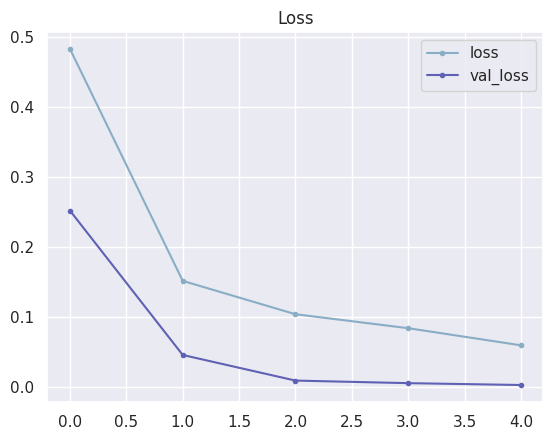

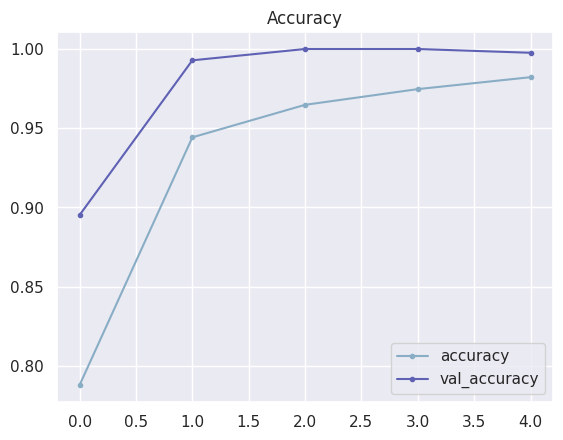

In [107]:
losses = pd.DataFrame(model.history.history)
plt.figure(figsize=(5, 4))
sns.set_theme(style="darkgrid", palette="twilight")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")

plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")

plt.savefig(f'{file_path}/model_training_acc.png',
            bbox_inches='tight', dpi=150)

plt.show()

## Model Evaluation

### Import saved model

In [108]:
from keras.models import load_model
model = load_model('outputs/v1/mildew_detector_model.h5')

## Evaluate model on test set

In [109]:
evaluation = model.evaluate(test_set, batch_size=batch_size)
print()

43/43 [==============================] - 3s 64ms/step - loss: 0.0408 - accuracy: 0.9964



## F1 Score

In [110]:
validation_set.reset()

x_true, y_true = next(test_set)
preds = np.argmax(model.predict(test_set), axis=1)
y_pred = np.rint(preds)
y_true = test_set.labels

In [111]:
from sklearn.metrics import f1_score
f1 = f1_score(y_true, y_pred, average='macro')
print("F1 Score: {:.2f}%".format(f1 * 100))

F1 Score: 33.33%


## Save evaluation PKL

In [112]:
joblib.dump(value=evaluation,
            filename=f"outputs/v1/evaluation.pkl")

['outputs/v1/evaluation.pkl']

# Predict on new data

Load random image as PIL

Image shape: (256, 256), Image mode: RGB


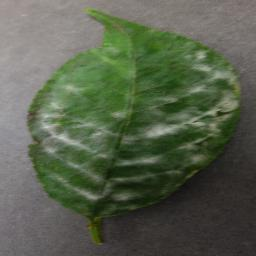

In [113]:
from tensorflow.keras.preprocessing import image

pointer = 66 
label = labels[1] # select Uninfected or Parasitized

pil_image = image.load_img(test_path + '/'+ label + '/'+ os.listdir(test_path+'/'+ label)[pointer],
                          target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

### Convert image to array and prepare for prediction

In [114]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)
print(my_image.shape)

(1, 256, 256, 3)


### Predict class probabilities

In [130]:
pred_proba = model.predict(my_image)[0,0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class =  target_map[pred_proba > 0.5]  

if pred_class == target_map[0]: pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

if pred_proba == 1.0:
    print("Status: Infected")
elif pred_proba == 0.0:
    print("Status: Healthy")

1.0
powdery_mildew
Status: Infected
